In [ ]:
!pip install wandb -q

     |████████████████████████████████| 1.4MB 3.4MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 
     |████████████████████████████████| 112kB 25.7MB/s 
     |████████████████████████████████| 163kB 16.1MB/s 
     |████████████████████████████████| 102kB 7.9MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 


In [ ]:
# wandb 로그인
!wandb login

wandb: You can find your API key in your browser here: https://app.wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 918e40f006a10e96dd6953e69b495e04e22a0f4c
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [ ]:
import wandb
from wandb.keras import WandbCallback

# step 1
### sweep_config에 parameter 넣어두기 (search_space 지정하기)

In [ ]:
# Configure the sweep – 실험하고 싶은 parameter를 추가로 넣어줄 수 있습니다.
# 콜랩에서 한 40분에 60개 돌아가던데 와이파이 안정적인 거 잡고 켜놓고 놀면 됩니다. ㅎㅎ

sweep_config = {
    'method': 'random', 
    'metric': {
      'name': 'accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        'epochs': {
            'values': [3, 7, 10, 15]
        },
        'dropout': {
            'values': [0.2, 0.3, 0.4, 0.5]
        },
        'hidden': {
            'values': [128, 256, 512]
        },
        'learning_rate': {
            'values': [1e-2, 1e-3, 1e-45]
        },
        'optimizer': {
            'values': ['adam', 'rmsprop']
        },
        'activation': {
            'values': ['relu']
        }
        }
    }

# step2. initialize하기

In [ ]:
# Arguments:
#     – sweep_config: 위에서 정의한 parameter 딕셔너리
#     – entity: 유저네임 (프로젝트)
#     – project: 프로젝트 이름 (없으면 wandb에 새로 생김)
sweep_id = wandb.sweep(sweep_config, entity="username", project="project_name")

Create sweep with ID: 6ecm3gdu
Sweep URL: https://app.wandb.ai/gon2gon2/wandbb/sweeps/6ecm3gdu


**entitiy 보는 법(wandb에서 볼 수 있음!)**
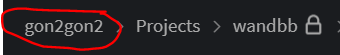


## 데이터 불러오기

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat',
               'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot']

In [ ]:
# 지워도 됨 ㅎㅎ
'''
train_images는 28 x 28의 이미지가 6만장,
test_images는 28 x 28의 이미지가 1만장 있음
'''

'\ntrain_images는 28 x 28의 이미지가 6만장,\ntest_images는 28 x 28의 이미지가 1만장 있음\n'

In [ ]:
train_images = train_images/255.
test_images = test_images/255.

# step 3
### 초기화하고 parameter대로 모델을 쌓아 실험하는 train 함수를 정의

In [ ]:
# (초기화 -> config값 바꿔주고 -> 모델 쌓고 -> 학습) 을 무한반복
def train():

  # 처음엔 config 내용이 이렇게 시작하는데 밑에서 바뀜 ㅎㅎ

  config_defaults = {
    'epochs': 2,
    'learning_rate': 1e-3,
    'activation': 'relu',
    'hidden': 128,
    'optimizer': 'adam',
    'dropout_rate':0.2
  }
  # Initialize a new wandb run
  wandb.init(config=config_defaults)
      
  # Config is a variable that holds and saves hyperparameters and inputs
  # dkssudgktpdy wjsms rhslrhsldlqslek.
  config = wandb.config

  
  
  
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(config.hidden, activation=config.activation),
    keras.layers.Dropout(config.dropout_rate),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  adam = tf.keras.optimizers.Adam(config.learning_rate)
  model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  model.fit(train_images, train_labels, epochs=config.epochs, callbacks=[WandbCallback()])
  # evaluate는 안 해도 됨, 오히려 안 해야 wandb에 잘 저장됨

# step4
### agent한테 맡기고 딴짓하기

In [ ]:
# agent가 train함수에서 parameter를 바꿔가면서 저장해줍니다~
# wandb.agent(sweep_id, train)
#     – sweep_id: the sweep_id to run - this was returned above by wandb.sweep() 
#     – function: function that defines your model architecture and trains it / 위에서 정의한 train()을 값만 바꿔서 계속 돌려준다구~

wandb.agent(sweep_id, train)

wandb: Agent Starting Run: sv6d7vcc with config:
	activation: relu
	dropout: 0.5
	epochs: 15
	hidden: 256
	learning_rate: 3e-05
	optimizer: adam
wandb: Agent Started Run: sv6d7vcc


Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5080 - accuracy: 0.8186
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3873 - accuracy: 0.8580
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.8700
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3357 - accuracy: 0.8758
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3185 - accuracy: 0.8814
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3063 - accuracy: 0.8859
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2958 - accuracy: 0.8892
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2880 - accuracy: 0.8927
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2738 - accuracy: 0.8982
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.268

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5092 - accuracy: 0.8186
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3884 - accuracy: 0.8590
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3577 - accuracy: 0.8672
wandb: Agent Finished Run: 6ai8zlca 

wandb: Agent Starting Run: 4f8snmvi with config:
	activation: relu
	dropout: 0.3
	epochs: 7
	hidden: 128
	learning_rate: 1e-05
	optimizer: adam
wandb: Agent Started Run: 4f8snmvi


Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5364 - accuracy: 0.8101
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4009 - accuracy: 0.8552
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3684 - accuracy: 0.8652
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3452 - accuracy: 0.8739
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3275 - accuracy: 0.8803
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3184 - accuracy: 0.8820
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3071 - accuracy: 0.8853
wandb: Agent Finished Run: 4f8snmvi 

wandb: Agent Starting Run: t96o4urs with config:
	activation: relu
	dropout: 0.5
	epochs: 7
	hidden: 256
	learning_rate: 0.001
	optimizer: adam
wandb: Agent Started Run: t96o4urs


Epoch 1/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5053 - accuracy: 0.8200
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3884 - accuracy: 0.8574
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3548 - accuracy: 0.8700
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3328 - accuracy: 0.8770
Epoch 5/7
 858/1875 [============>.................] - ETA: 2s - loss: 0.3150 - accuracy: 0.8833

# 다 돌리고 나면